## Aim:
Implement decision tree on crop dataset

## Theory
- decision trees are a nnparametric supervised earning method used for classification and regression
- mdel learns simple decision rules inferred from the data features
- tree is piecewise constant approximation
## 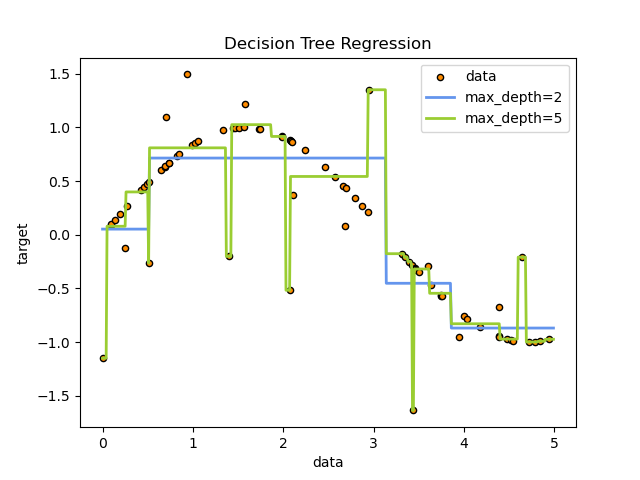

## Code
so and i am in the 


## Result

## Learning outcome

## References
- https://en.wikipedia.org/wiki/Decision_tree_learning
- 